In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('/content/Social_Network_Ads.csv')
df

User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]

In [4]:
df=df.iloc[:, 2:]
df

Age  EstimatedSalary  Purchased
0     19            19000          0
1     35            20000          0
2     26            43000          0
3     27            57000          0
4     19            76000          0
..   ...              ...        ...
395   46            41000          1
396   51            23000          1
397   50            20000          1
398   36            33000          0
399   49            36000          1

[400 rows x 3 columns]

In [5]:
df.sample(5)

Age  EstimatedSalary  Purchased
311   39            96000          1
216   49            65000          0
62    23            66000          0
154   40            47000          0
191   19            26000          0

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop('Purchased',axis=1),df['Purchased'],test_size=0.3,random_state=0)
X_train.shape, X_test.shape

((280, 2), (120, 2))

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df.drop('Purchased', axis=1),
    df['Purchased'],
    test_size=0.3,
    random_state=0
)

X_train.shape, X_test.shape


((280, 2), (120, 2))

In [15]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

scaler.fit (X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled =scaler.transform(X_test)

In [16]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [19]:
X_train

Age  EstimatedSalary
92    26            15000
223   60           102000
234   38           112000
232   40           107000
377   42            53000
..   ...              ...
323   48            30000
192   29            43000
117   36            52000
47    27            54000
172   26           118000

[280 rows x 2 columns]

In [21]:
X_train_scaled

Age  EstimatedSalary
0   -1.163172        -1.584970
1    2.170181         0.930987
2    0.013305         1.220177
3    0.209385         1.075582
4    0.405465        -0.486047
..        ...              ...
275  0.993704        -1.151185
276 -0.869053        -0.775237
277 -0.182774        -0.514966
278 -1.065133        -0.457127
279 -1.163172         1.393691

[280 rows x 2 columns]

In [17]:

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [18]:
np.round(X_train.describe(), 1)

Age  EstimatedSalary
count  280.0            280.0
mean    37.9          69807.1
std     10.2          34641.2
min     18.0          15000.0
25%     30.0          43000.0
50%     37.0          70500.0
75%     46.0          88000.0
max     60.0         150000.0

In [22]:
np.round(X_train_scaled.describe(), 1)

Age  EstimatedSalary
count  280.0            280.0
mean     0.0              0.0
std      1.0              1.0
min     -1.9             -1.6
25%     -0.8             -0.8
50%     -0.1              0.0
75%      0.8              0.5
max      2.2              2.3

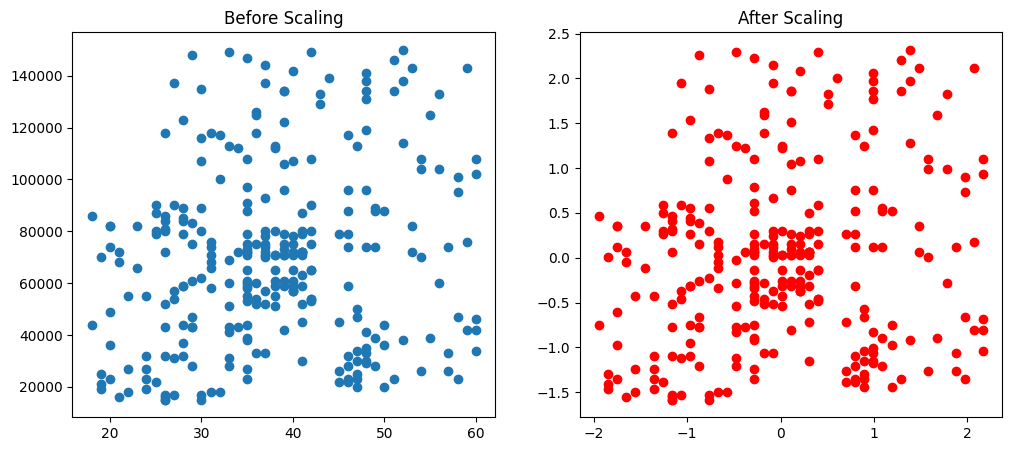

In [23]:
fig, (ax1,ax2) =plt.subplots(ncols=2, figsize=(12,5))

ax1.scatter(X_train['Age'],X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'],X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")
plt.show()

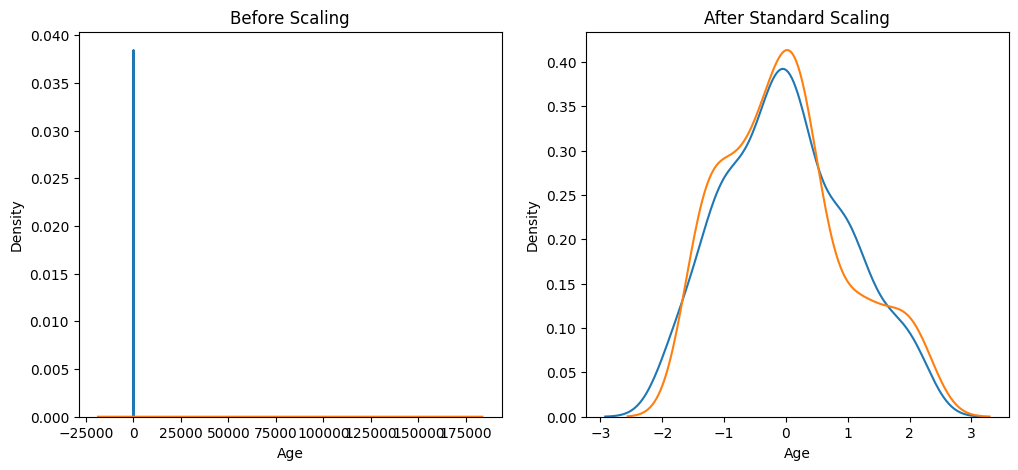

In [25]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12,5))

#before scaling
ax1.set_title("Before Scaling")
sns.kdeplot(X_train['Age'], ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)


#after scaling
ax2.set_title("After Standard Scaling")
sns.kdeplot(X_train_scaled['Age'],ax=ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()
